In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# scikit-learn
import sklearn

# 수치형 변환
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# PCA (차원 축소 : 주성분분석)
from sklearn.decomposition import PCA

# 문제지, 답안지 분리
from sklearn.model_selection import train_test_split

# 회귀 모델 (+ 통계)
# from sklearn.linear_model import LogisticRegression --> 분류 모델 / 회귀 XXXXXXXX
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 외부(Google) 회귀모델 (+ 별도설치 )
# import xgboost as xgb
# import lightgbm as lgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 정규화 / 스케일러
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 교차 검증 : StratifiedKFold (y를 고르게 폴드에 분배한다는 것은 회귀에서 없다) 
from sklearn.model_selection import KFold, cross_validate, GridSearchCV

# 회귀 평가 매트릭스
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import StackingRegressor

# matplotlib 차트 스타일을 seaborn 스타일로 설정
sns.set()

# ----------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [35]:
df = pd.read_csv('../data/train.csv')
df.head(5)

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [36]:
df = df.drop('id', axis=1)
df.columns = ['rs', 'al', 'vc', 'aq', 'is', 'lpl', 'ms', 'tdm', 'e', 'bpm']
df.head()

,rs,al,vc,aq,is,lpl,ms,tdm,e,bpm
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   rs      524164 non-null  float64
 1   al      524164 non-null  float64
 2   vc      524164 non-null  float64
 3   aq      524164 non-null  float64
 4   is      524164 non-null  float64
 5   lpl     524164 non-null  float64
 6   ms      524164 non-null  float64
 7   tdm     524164 non-null  float64
 8   e       524164 non-null  float64
 9   bpm     524164 non-null  float64
dtypes: float64(10)
memory usage: 40.0 MB


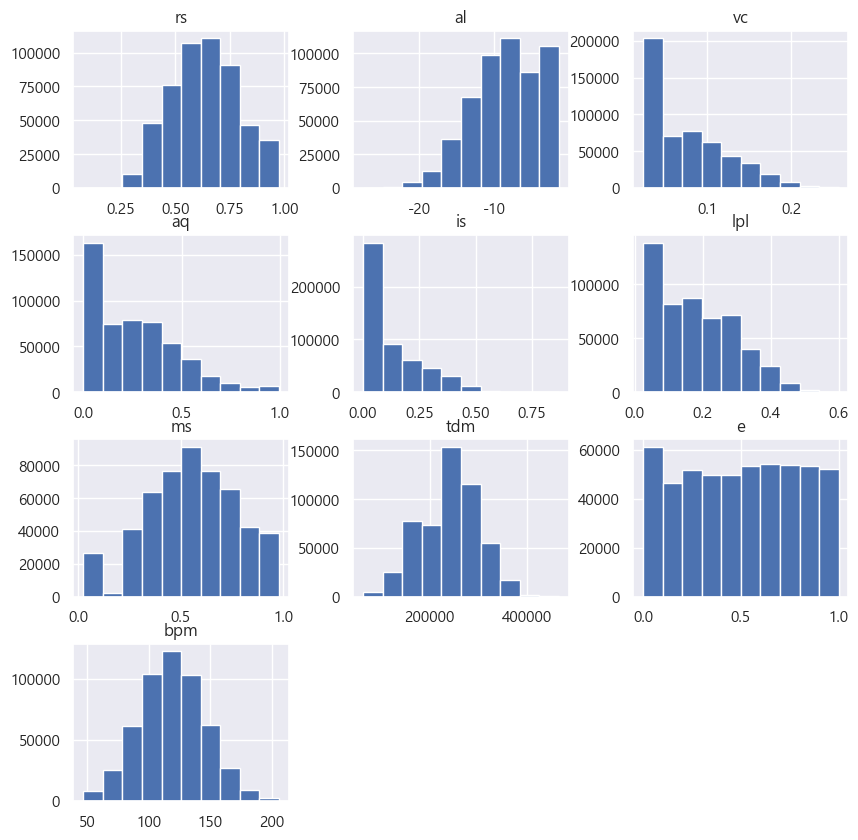

In [5]:
df.hist(figsize=(10, 10))
plt.show()

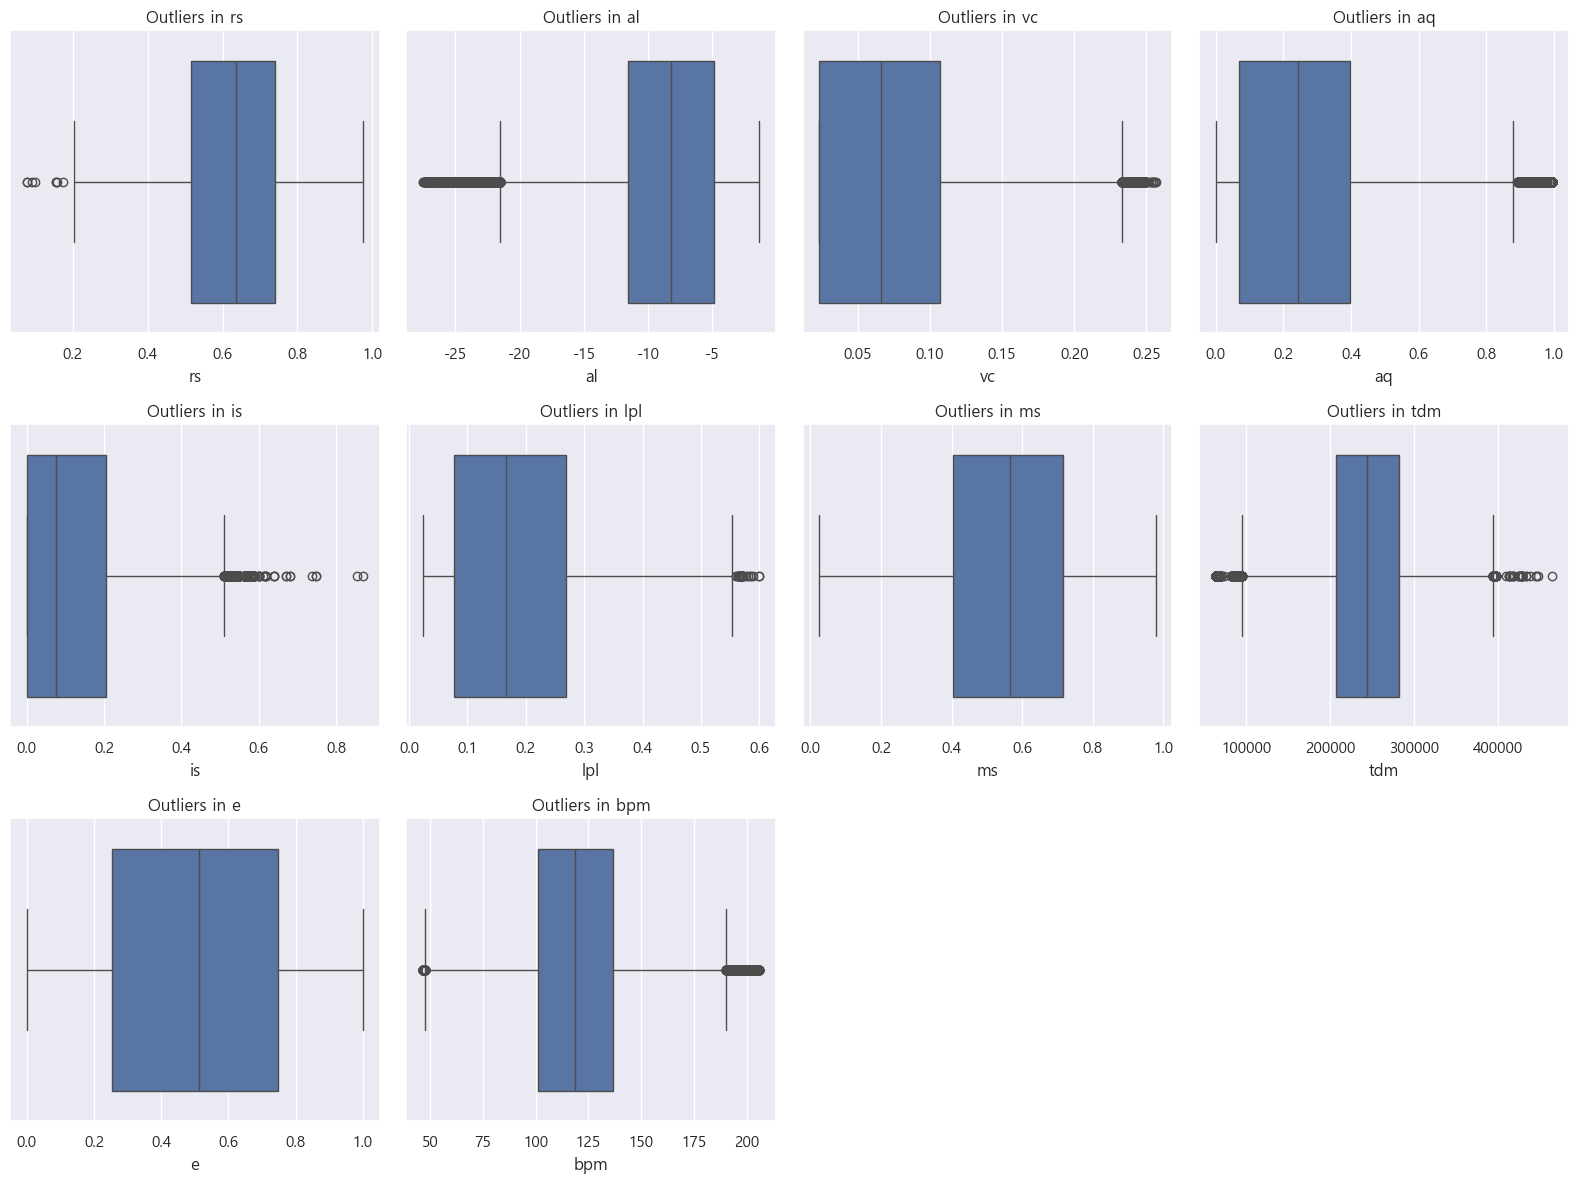

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# 분석할 숫자형 특성들 선택
# 예시: df가 이미 있고, 모든 열이 숫자형이라고 가정
# num_features = df.columns
num_features = df.select_dtypes(include=np.number).columns.tolist()


# 1. 전체 그림의 크기와 격자(grid) 설정
n_features = len(num_features)
n_cols = 4  # 한 줄에 그릴 그래프의 개수 (원하는 대로 조절)
n_rows = math.ceil(n_features / n_cols) # 필요한 줄의 개수 자동 계산

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2차원 배열을 1차원으로 변환하여 다루기 쉽게 함

# 2. for문을 사용하여 각 subplot에 boxplot 그리기
for i, col in enumerate(num_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. 남는 빈 subplot들은 보이지 않게 처리
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. 전체 그림을 보기 좋게 조정하고 출력
plt.tight_layout()
plt.show()

In [7]:
# IQR 기반 이상치 행 삭제 코드

import pandas as pd
import numpy as np

# 1. 원본 DataFrame을 안전하게 복사
df_trimmed = df.copy()

# 2. 이상치를 확인할 숫자형 특성(feature)들의 리스트
# 예시: num_features = ['age', 'income', 'score']
# 이 리스트는 실제 데이터에 맞게 수정해야 합니다.
num_features = df_trimmed.select_dtypes(include=np.number).columns.tolist()

# 3. 각 숫자형 특성에 대해 이상치 행 삭제
for col in num_features:
    Q1 = df_trimmed[col].quantile(0.25)
    Q3 = df_trimmed[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 정상 범위에 있는 행만 남김
    df_trimmed = df_trimmed[(df_trimmed[col] >= lower_bound) & (df_trimmed[col] <= upper_bound)]

# 4. 결과 확인
print("Original DataFrame Shape:", df.shape)
print("Trimmed DataFrame Shape:", df_trimmed.shape)

Original DataFrame Shape: (524164, 10)
Trimmed DataFrame Shape: (505206, 10)


In [40]:
# IQR 기반 이상치 대체(Winsorization) 코드

import pandas as pd
import numpy as np

# 1. 원본 DataFrame을 안전하게 복사
df_winsorized = df.copy()

# 2. 이상치를 확인할 숫자형 특성(feature)들의 리스트
# 이 리스트는 실제 데이터에 맞게 수정해야 합니다.
num_features = df_winsorized.select_dtypes(include=np.number).columns.tolist()

# 3. 복사본(df_winsorized)의 이상치를 경계값으로 대체
for col in num_features:
    Q1 = df_winsorized[col].quantile(0.25)
    Q3 = df_winsorized[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Winsorization (capping)
    df_winsorized[col] = np.where(df_winsorized[col] < lower_bound, lower_bound,
                                  np.where(df_winsorized[col] > upper_bound, upper_bound, df_winsorized[col]))

# 4. 결과 확인
print("Original DataFrame Shape:", df.shape)
print("Winsorized DataFrame Shape:", df_winsorized.shape)
# df_winsorized.describe() # 데이터가 어떻게 변했는지 확인

Original DataFrame Shape: (524164, 10)
Winsorized DataFrame Shape: (524164, 10)


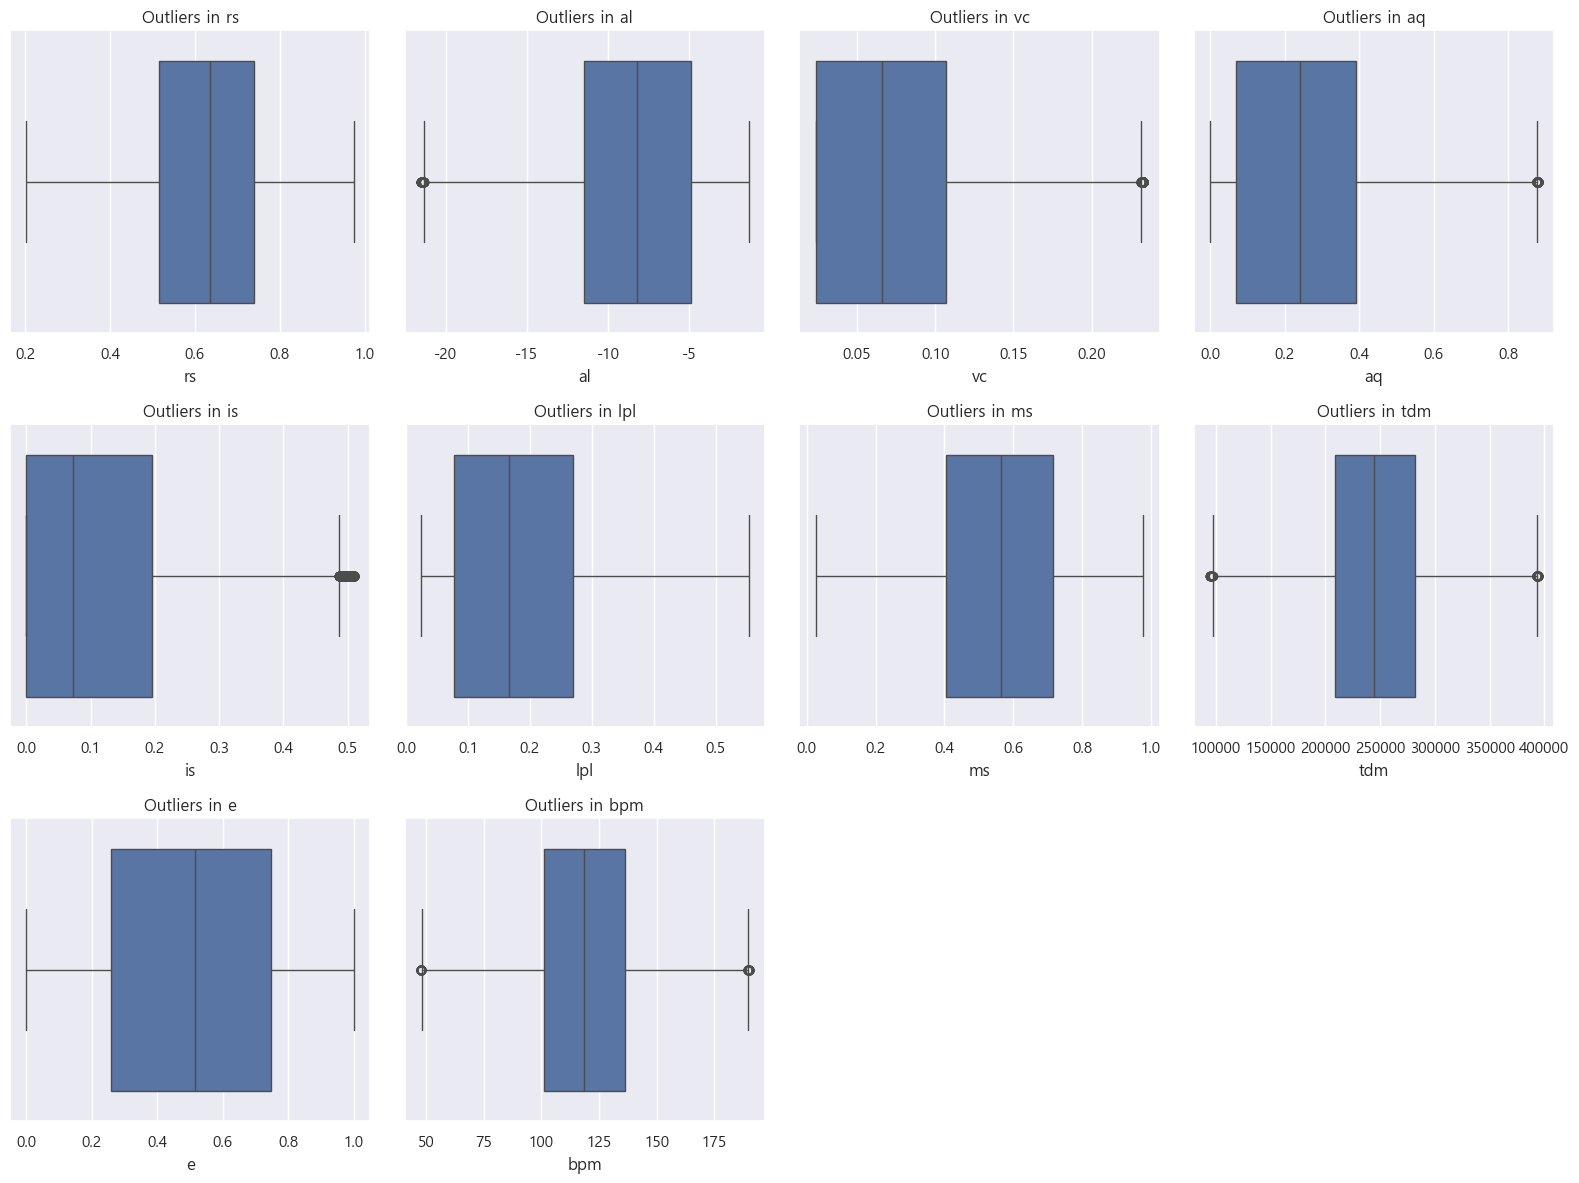

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# 분석할 숫자형 특성들 선택
# 예시: df가 이미 있고, 모든 열이 숫자형이라고 가정
# num_features = df.columns
num_features = df_trimmed.select_dtypes(include=np.number).columns.tolist()


# 1. 전체 그림의 크기와 격자(grid) 설정
n_features = len(num_features)
n_cols = 4  # 한 줄에 그릴 그래프의 개수 (원하는 대로 조절)
n_rows = math.ceil(n_features / n_cols) # 필요한 줄의 개수 자동 계산

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2차원 배열을 1차원으로 변환하여 다루기 쉽게 함

# 2. for문을 사용하여 각 subplot에 boxplot 그리기
for i, col in enumerate(num_features):
    sns.boxplot(x=df_trimmed[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. 남는 빈 subplot들은 보이지 않게 처리
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. 전체 그림을 보기 좋게 조정하고 출력
plt.tight_layout()
plt.show()

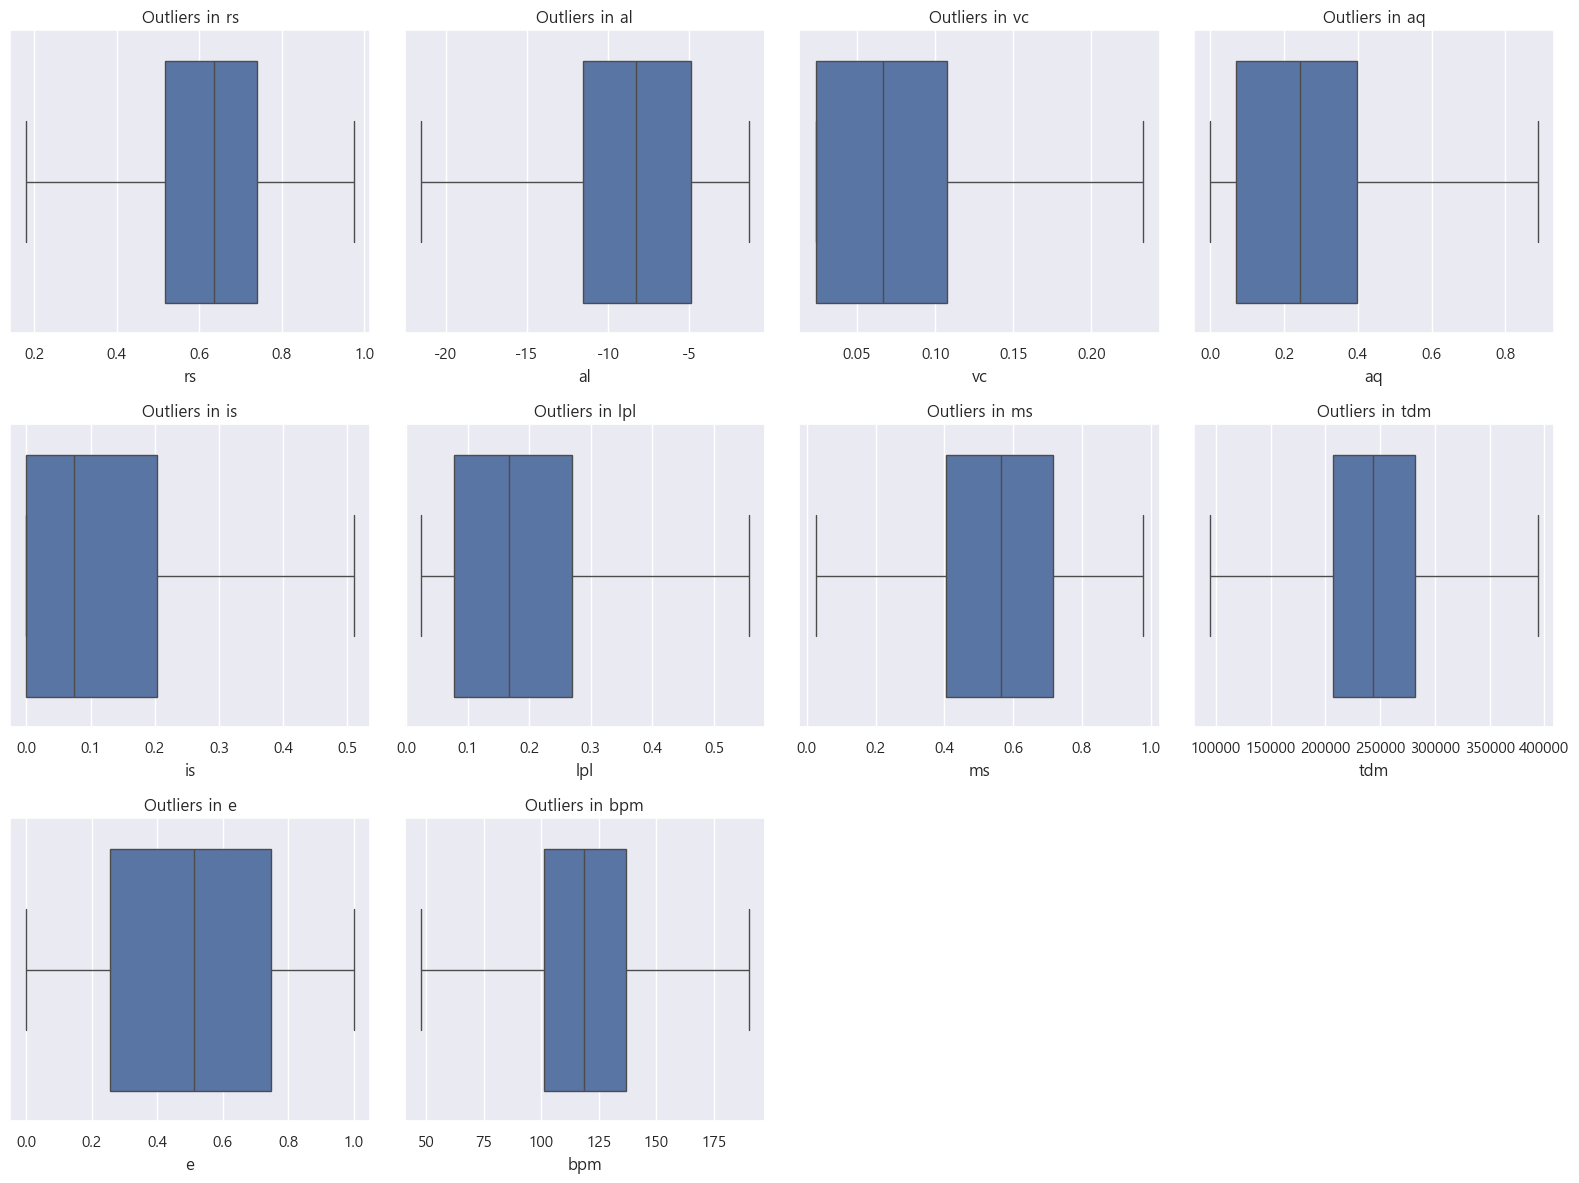

In [41]:
num_features = df_winsorized.select_dtypes(include=np.number).columns.tolist()


# 1. 전체 그림의 크기와 격자(grid) 설정
n_features = len(num_features)
n_cols = 4  # 한 줄에 그릴 그래프의 개수 (원하는 대로 조절)
n_rows = math.ceil(n_features / n_cols) # 필요한 줄의 개수 자동 계산

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten() # 2차원 배열을 1차원으로 변환하여 다루기 쉽게 함

# 2. for문을 사용하여 각 subplot에 boxplot 그리기
for i, col in enumerate(num_features):
    sns.boxplot(x=df_winsorized[col], ax=axes[i])
    axes[i].set_title(f"Outliers in {col}")

# 3. 남는 빈 subplot들은 보이지 않게 처리
for j in range(n_features, len(axes)):
    axes[j].axis('off')

# 4. 전체 그림을 보기 좋게 조정하고 출력
plt.tight_layout()
plt.show()

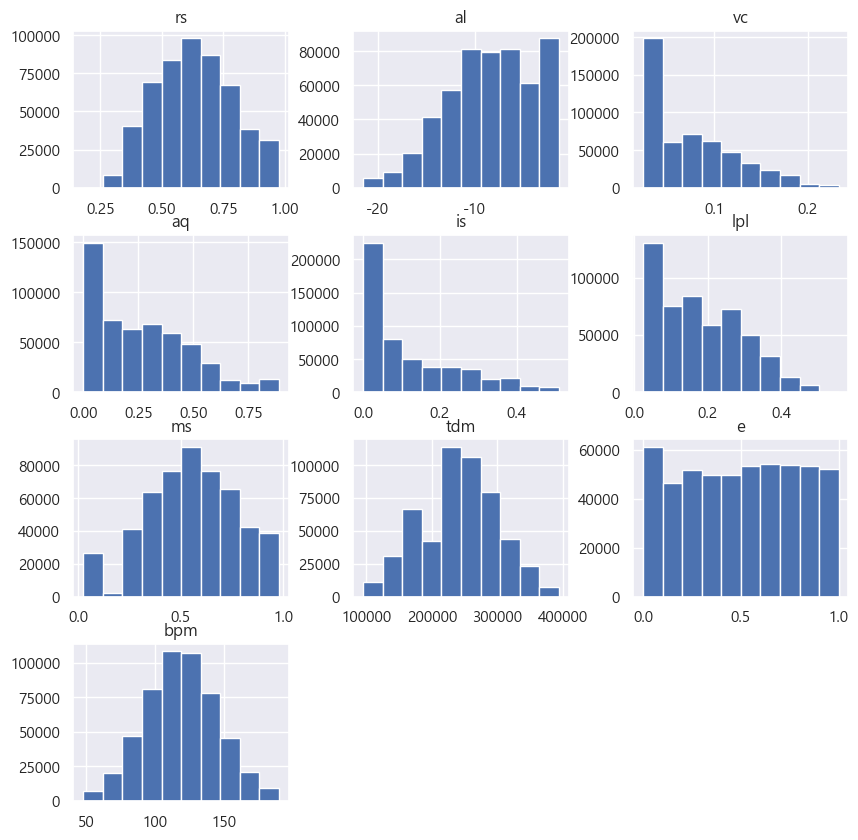

In [42]:
dfw = df_winsorized
dfw.hist(figsize=(10, 10))
plt.show()

# 파이프 라인

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

In [43]:
y = dfw['bpm']
X = dfw.drop('bpm', axis=1)

from scipy.stats import skew,  kurtosis
s = pd.Series( skew(X) , index=X.columns)
k = pd.Series( kurtosis(X), index=X.columns)
print(s,'\n',k)

rs     0.168312
al    -0.277784
vc     0.784150
aq     0.683496
is     1.015470
lpl    0.392639
ms    -0.268819
tdm   -0.117443
e     -0.030343
dtype: float64 
 rs    -0.527269
al    -0.508426
vc    -0.170850
aq    -0.150533
is     0.054721
lpl   -0.757076
ms    -0.142285
tdm   -0.344598
e     -1.209077
dtype: float64


In [44]:
X80,X20,y80,y20 = train_test_split(X, y, test_size=0.2, random_state=8989)
X80.shape, y80.shape, X20.shape, y20.shape

((419331, 9), (419331,), (104833, 9), (104833,))

In [45]:
model = XGBRegressor()

model.fit(X80,y80)
pred = model.predict(X20)
mse = mean_squared_error(y20, pred)
print(mse)

700.2772193345596


In [46]:
tran_pipe = TransformedTargetRegressor (
                Pipeline([ ('my_log1p', FunctionTransformer(np.log1p, validate=True)), 
                           ('my_scaler', StandardScaler()),
                           ('my_model', XGBRegressor())
                       ]),
                func=np.log1p, 
                inverse_func=np.expm1
)
tran_pipe.fit(X80, y80)
pred = tran_pipe.predict(X20)
#############  pred = np.expm1(pred_log)
mse = mean_squared_error(y20, pred)
print(mse)

709.5900445148106


In [47]:
dfw.columns

Index(['rs', 'al', 'vc', 'aq', 'is', 'lpl', 'ms', 'tdm', 'e', 'bpm'], dtype='object')

In [18]:
# 로그 변환 대상
log_features = ['vc', 'aq', 'is']

# 1️⃣ 피처 변환 파이프라인
feature_pipe = ColumnTransformer([
    ('log_transform', FunctionTransformer(np.log1p, validate=True), log_features),
    ('pass', 'passthrough', [col for col in X80.columns if col not in log_features])
])

# 2️⃣ 전체 모델 파이프라인
model = Pipeline([
    ('feature_pipe', feature_pipe),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor())
])

# 3️⃣ 타깃 로그변환 + 역변환 자동 적용
tran_pipe = TransformedTargetRegressor(
    regressor=model,
    func=np.log1p,
    inverse_func=np.expm1
)

# 4️⃣ 학습
tran_pipe.fit(X80, y80)

# 5️⃣ 예측 (inverse 자동 적용됨)
pred = tran_pipe.predict(X20)

# 6️⃣ 평가
mse = mean_squared_error(y20, pred)
print("MSE:", mse)

MSE: 709.7010217300203


In [19]:
# 로그 스케일러 변환 후 mse 값 오히려 안좋아졌기에 제외

In [48]:
# ====================================
# 2️⃣ Base models (XGB + LGBM)
# ====================================
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist',  # ✅ GPU 학습
    predictor='gpu_predictor'
)

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    device='gpu'
)

# ====================================
# 3️⃣ Meta model (stacking layer)
# ====================================
# 보통 간단한 Ridge나 LinearRegression 사용
meta_model = RidgeCV(alphas=np.logspace(-3, 3, 7))
#후보 alpha: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# ====================================
# 4️⃣ Stacking Regressor
# ====================================
stack_model = StackingRegressor(
    estimators=[
        ("xgb", xgb),
        ("lgbm", lgbm)
    ],
    final_estimator=meta_model,
    passthrough=False,  # base 모델 입력을 meta model에 추가할지 여부
    n_jobs=-1
)

# ====================================
# 6️⃣ 학습 및 평가
# ====================================
stack_model.fit(X80, y80)
pred = stack_model.predict(X20)

mse = mean_squared_error(y20, pred)
print("Stacking MSE:", mse)
print("Stacking RMSE:", rmse)

Stacking MSE: 694.5066184186078
Stacking RMSE: 26.356493784734894


# 피쳐 추가

In [21]:
dfw['tdM'] = dfw['tdm'] / 60000
dfw['ear'] = dfw['e'] / (df['aq'] + 1e-5)
dfw['vib'] = dfw['vc'] / (df['is'] + 1e-5)
dfw['mr'] = dfw['ms'] * df['rs']
dfw['pi'] = dfw['lpl'] * df['al']
dfw['re'] = dfw['rs'] * df['e']
dfw['ma'] = dfw['ms'] * df['aq']

In [22]:
dfw.head()

,rs,al,vc,aq,is,lpl,ms,tdm,e,bpm,tdM,ear,vib,mr,pi,re,ma
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020,4.845261,53793.402799,2122.854562,0.247399,-0.392428,0.498743,0.000002
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963,2.741992,0.326786,0.204678,0.416289,-2.773989,0.092976,0.289653
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989,2.908259,3.596060,0.243959,0.218095,-0.471836,0.321415,0.073625
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212,3.759458,293.506628,0.331594,0.204728,-0.117199,0.358026,0.000460
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511,3.566011,13.790031,2122.854562,0.254636,-4.326189,0.504899,0.032817


In [23]:
y = dfw['bpm']
X = dfw.drop('bpm', axis=1)

from scipy.stats import skew,  kurtosis
s = pd.Series( skew(X) , index=X.columns)
k = pd.Series( kurtosis(X), index=X.columns)
print(s,'\n',k)

rs     0.168312
al    -0.277784
vc     0.784150
aq     0.683496
is     1.015470
lpl    0.392639
ms    -0.268819
tdm   -0.117443
e     -0.030343
tdM   -0.117443
ear    2.116400
vib    1.971779
mr     0.351370
pi    -1.382187
re     0.479533
ma     1.317625
dtype: float64 
 rs    -0.527269
al    -0.508426
vc    -0.170850
aq    -0.150533
is     0.054721
lpl   -0.757076
ms    -0.142285
tdm   -0.344598
e     -1.209077
tdM   -0.344598
ear    2.899371
vib    3.188912
mr     0.160848
pi     2.085577
re    -0.268825
ma     2.032527
dtype: float64


In [24]:
X80,X20,y80,y20 = train_test_split(X, y, test_size=0.2, random_state=8989)
X80.shape, y80.shape, X20.shape, y20.shape

((419331, 16), (419331,), (104833, 16), (104833,))

In [25]:
model = XGBRegressor()

model.fit(X80,y80)
pred = model.predict(X20)
mse = mean_squared_error(y20, pred)
print(mse)

700.2994750011745


In [26]:
tran_pipe = TransformedTargetRegressor (
                Pipeline([ ('my_log1p', FunctionTransformer(np.log1p, validate=True)), 
                           ('my_scaler', StandardScaler()),
                           ('my_model', XGBRegressor())
                       ]),
                func=np.log1p, 
                inverse_func=np.expm1
)
tran_pipe.fit(X80, y80)
pred = tran_pipe.predict(X20)
#############  pred = np.expm1(pred_log)
mse = mean_squared_error(y20, pred)
print(mse)

709.4391172340412


In [27]:
dfw.columns

Index(['rs', 'al', 'vc', 'aq', 'is', 'lpl', 'ms', 'tdm', 'e', 'bpm', 'tdM',
       'ear', 'vib', 'mr', 'pi', 're', 'ma'],
      dtype='object')

In [28]:
# 로그 변환 대상
log_features = ['vc', 'aq', 'is','ear','vib','pi']

# 1️⃣ 피처 변환 파이프라인
feature_pipe = ColumnTransformer([
    ('log_transform', FunctionTransformer(np.log1p, validate=True), log_features),
    ('pass', 'passthrough', [col for col in X80.columns if col not in log_features])
])

# 2️⃣ 전체 모델 파이프라인
model = Pipeline([
    ('feature_pipe', feature_pipe),
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor())
])

# 3️⃣ 타깃 로그변환 + 역변환 자동 적용
tran_pipe = TransformedTargetRegressor(
    regressor=model,
    func=np.log1p,
    inverse_func=np.expm1
)

# 4️⃣ 학습
tran_pipe.fit(X80, y80)

# 5️⃣ 예측 (inverse 자동 적용됨)
pred = tran_pipe.predict(X20)

# 6️⃣ 평가
mse = mean_squared_error(y20, pred)
print("MSE:", mse)

MSE: 709.729835362135


In [29]:
# ====================================
# 2️⃣ Base models (XGB + LGBM)
# ====================================
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist',  # ✅ GPU 학습
    predictor='gpu_predictor'
)

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    device='gpu'
)

# ====================================
# 3️⃣ Meta model (stacking layer)
# ====================================
# 보통 간단한 Ridge나 LinearRegression 사용
meta_model = RidgeCV(alphas=np.logspace(-3, 3, 7))
#후보 alpha: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# ====================================
# 4️⃣ Stacking Regressor
# ====================================
stack_model = StackingRegressor(
    estimators=[
        ("xgb", xgb),
        ("lgbm", lgbm)
    ],
    final_estimator=meta_model,
    passthrough=False,  # base 모델 입력을 meta model에 추가할지 여부
    n_jobs=-1
)

# ====================================
# 6️⃣ 학습 및 평가
# ====================================
stack_model.fit(X80, y80)
pred = stack_model.predict(X20)

mse = mean_squared_error(y20, pred)
rmse = root_mean_squared_error(y20, pred)
print("Stacking MSE:", mse)
print("Stacking RMSE:", rmse)

Stacking MSE: 694.5373688515122
Stacking RMSE: 26.354076892418604


In [30]:
# # ====================================
# # 1️⃣ Feature Engineering
# # ====================================
# def create_features(df):
#     """새로운 피처 생성"""
#     df_new = df.copy()
    
#     # 상호작용 피처
#     df_new['energy_loudness'] = df_new['e'] * abs(df_new['al'])
#     df_new['rhythm_energy'] = df_new['rs'] * df_new['e']
#     df_new['vocal_acoustic'] = df_new['vc'] * df_new['aq']
    
#     # 비율 피처
#     df_new['instrumental_vocal_ratio'] = df_new['is'] / (df_new['vc'] + 1e-6)
#     df_new['mood_energy_ratio'] = df_new['ms'] / (df_new['e'] + 1e-6)
    
#     # 다항 피처
#     df_new['energy_squared'] = df_new['e'] ** 2
#     df_new['rhythm_squared'] = df_new['rs'] ** 2
    
#     # 시간 관련 피처
#     df_new['tdm_minutes'] = df_new['tdm'] / 60000
#     df_new['tdm_log'] = np.log1p(df_new['tdm'])
    
#     # 음량 절대값
#     df_new['al_abs'] = abs(df_new['al'])
    
#     return df_new

# # ====================================
# # 2️⃣ 데이터 준비 (이상치 제거 버전)
# # ====================================
# y = dfw['bpm']
# X = dfw.drop('bpm', axis=1)

# # Feature Engineering 적용
# X_engineered = create_features(X)

# # Train/Test Split
# X80, X20, y80, y20 = train_test_split(
#     X_engineered, y, 
#     test_size=0.2, 
#     random_state=8989
# )

# print(f"Original features: {X.shape[1]}")
# print(f"Engineered features: {X_engineered.shape[1]}")

# # ====================================
# # 3️⃣ 모델 1: XGBoost with Hyperparameter Tuning
# # ====================================
# from sklearn.model_selection import RandomizedSearchCV

# xgb_params = {
#     'n_estimators': [300, 500, 700],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [4, 6, 8, 10],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'gamma': [0, 0.1, 0.2]
# }

# xgb_model = XGBRegressor(
#     random_state=42,
#     n_jobs=-1,
#     tree_method='gpu_hist',  # ✅ GPU 학습
#     predictor='gpu_predictor'
# )

# # RandomizedSearch (시간 절약)
# xgb_search = RandomizedSearchCV(
#     xgb_model,
#     xgb_params,
#     n_iter=20,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     random_state=42,
#     n_jobs=-1,
#     verbose=1
# )

# print("\n🔍 XGBoost Hyperparameter Tuning...")
# xgb_search.fit(X80, y80)
# best_xgb = xgb_search.best_estimator_

# pred_xgb = best_xgb.predict(X20)
# mse_xgb = mean_squared_error(y20, pred_xgb)
# rmse_xgb = np.sqrt(mse_xgb)
# r2_xgb = r2_score(y20, pred_xgb)

# print(f"✅ XGBoost Best Params: {xgb_search.best_params_}")
# print(f"   MSE: {mse_xgb:.2f}")
# print(f"   RMSE: {rmse_xgb:.2f}")
# print(f"   R²: {r2_xgb:.4f}")

# # ====================================
# # 4️⃣ 모델 2: LightGBM
# # ====================================
# lgbm_params = {
#     'n_estimators': [300, 500, 700],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'num_leaves': [31, 63, 127],
#     'max_depth': [6, 8, 10, -1],
#     'min_child_samples': [10, 20, 30],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# lgbm_model = LGBMRegressor(
#     random_state=42,
#     n_jobs=-1,
#     verbose=-1,
#     device='gpu'
# )

# lgbm_search = RandomizedSearchCV(
#     lgbm_model,
#     lgbm_params,
#     n_iter=20,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     random_state=42,
#     n_jobs=-1,
#     verbose=1
# )

# print("\n🔍 LightGBM Hyperparameter Tuning...")
# lgbm_search.fit(X80, y80)
# best_lgbm = lgbm_search.best_estimator_

# pred_lgbm = best_lgbm.predict(X20)
# mse_lgbm = mean_squared_error(y20, pred_lgbm)
# rmse_lgbm = np.sqrt(mse_lgbm)
# r2_lgbm = r2_score(y20, pred_lgbm)

# print(f"✅ LightGBM Best Params: {lgbm_search.best_params_}")
# print(f"   MSE: {mse_lgbm:.2f}")
# print(f"   RMSE: {rmse_lgbm:.2f}")
# print(f"   R²: {r2_lgbm:.4f}")

# # ====================================
# # 5️⃣ 앙상블: Weighted Average
# # ====================================
# # 더 성능 좋은 모델에 더 큰 가중치
# if mse_xgb < mse_lgbm:
#     w_xgb, w_lgbm = 0.6, 0.4
# else:
#     w_xgb, w_lgbm = 0.4, 0.6

# pred_ensemble = w_xgb * pred_xgb + w_lgbm * pred_lgbm
# mse_ensemble = mean_squared_error(y20, pred_ensemble)
# rmse_ensemble = np.sqrt(mse_ensemble)
# r2_ensemble = r2_score(y20, pred_ensemble)

# print(f"\n✅ Ensemble (Weighted Average)")
# print(f"   Weights: XGB={w_xgb}, LGBM={w_lgbm}")
# print(f"   MSE: {mse_ensemble:.2f}")
# print(f"   RMSE: {rmse_ensemble:.2f}")
# print(f"   R²: {r2_ensemble:.4f}")

# # ====================================
# # 8️⃣ 최종 결과 요약
# # ====================================
# results = pd.DataFrame({
#     'Model': ['XGBoost', 'LightGBM', 'Ensemble'],
#     'MSE': [mse_xgb, mse_lgbm, mse_ensemble],
#     'RMSE': [rmse_xgb, rmse_lgbm, rmse_ensemble],
#     'R²': [r2_xgb, r2_lgbm, r2_ensemble]
# })
# print("\n📈 Final Results Summary:")
# print(results.to_string(index=False))

# 규제

alpha:0.01  RMSE:26.3567
alpha:0.1  RMSE:26.3579
alpha:1.0  RMSE:26.3582
alpha:10.0  RMSE:26.3582
alpha:100  RMSE:26.3582


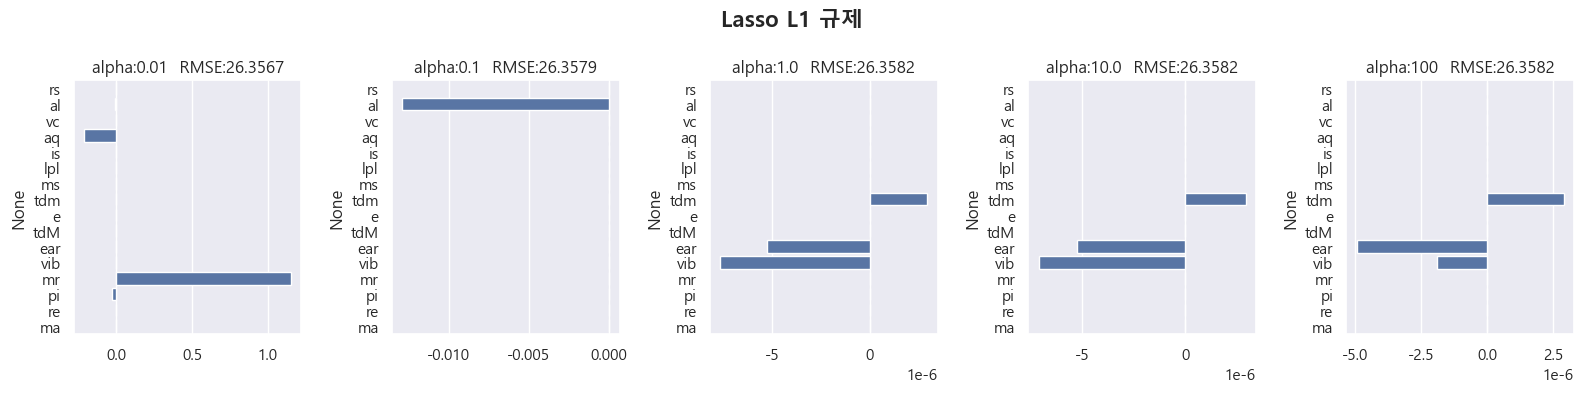

In [31]:
fig, axes = plt.subplots(1, 5, figsize=(16,4))
for (i,ap) in enumerate([0.01, 0.1, 1.0, 10.0, 100]):
    model = Lasso(alpha=ap, random_state=7458)
    model.fit(X80, y80)
    pred = model.predict(X20)
    #print(f"{ap}  {model.coef_} ")
    rmse = root_mean_squared_error(y20, pred)
    sns.barplot(x=model.coef_, y=X.columns, ax=axes[i])
    axes[i].set_title(f"alpha:{ap}  RMSE:{rmse:.4f}")
    print(f"alpha:{ap}  RMSE:{rmse:.4f}")
fig.suptitle("Lasso L1 규제", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

alpha:0.01  RMSE:26.3566
alpha:0.1  RMSE:26.3566
alpha:1.0  RMSE:26.3566
alpha:10.0  RMSE:26.3566
alpha:100  RMSE:26.3565


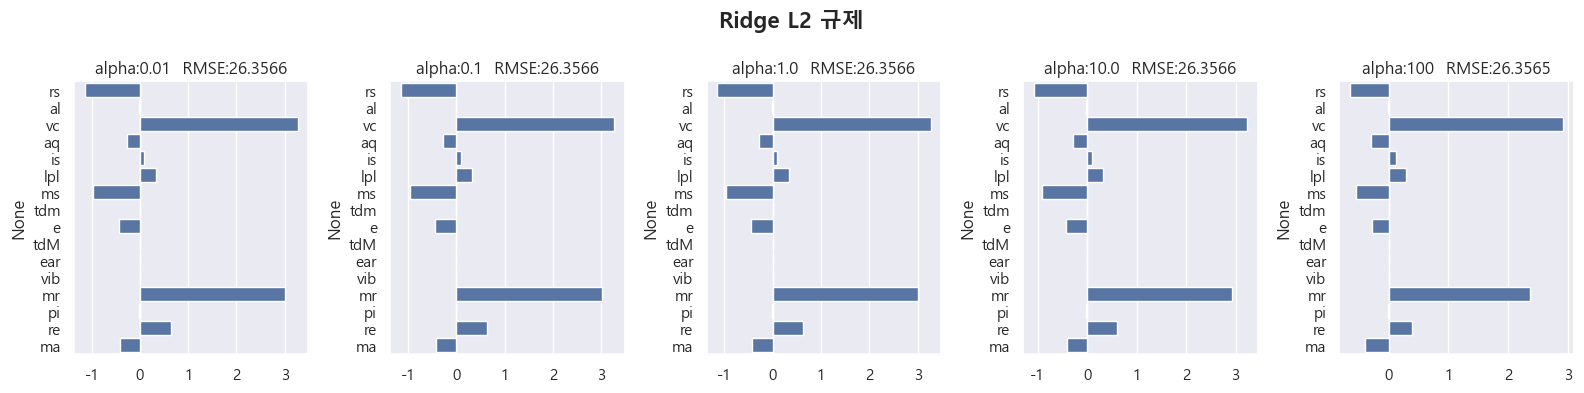

In [32]:
fig, axes = plt.subplots(1, 5, figsize=(16,4))
for (i,ap) in enumerate([0.01, 0.1, 1.0, 10.0, 100]):
    model = Ridge(alpha=ap, random_state=7458)
    model.fit(X80, y80)
    pred = model.predict(X20)
    #print(f"{ap}  {model.coef_} ")
    rmse = root_mean_squared_error(y20, pred)
    sns.barplot(x=model.coef_, y=X.columns, ax=axes[i])
    axes[i].set_title(f"alpha:{ap}  RMSE:{rmse:.4f}")
    print(f"alpha:{ap}  RMSE:{rmse:.4f}")
fig.suptitle("Ridge L2 규제", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=8989)

cv_model = GridSearchCV( Ridge(alpha=1.0, random_state=8989)
                        , param_grid={"alpha" : np.logspace(-3, 3, 7)}   #------모델튜닝 
                        , scoring="neg_root_mean_squared_error"
                        , cv=kf)             #------교차검증
cv_model.fit(X, y)
print(cv_model)
best_param = cv_model.best_params_
print(best_param)

best_score = -1*cv_model.best_score_
print(f"{best_score:.4f}")  #  neg는 음수를 뜻함(작은 값일수록 좋다)

best_model = cv_model.best_estimator_
print(best_model)
coef = best_model.coef_

GridSearchCV(cv=KFold(n_splits=5, random_state=8989, shuffle=True),
             estimator=Ridge(random_state=8989),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='neg_root_mean_squared_error')
{'alpha': 100.0}
26.4020
Ridge(alpha=100.0, random_state=8989)


In [54]:
xgb = XGBRegressor(
    tree_method="gpu_hist",
    predictor="gpu_predictor",
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
)

lgb = LGBMRegressor(
    device="gpu",
    boosting_type="gbdt",
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
)

meta_model = RidgeCV(alphas=np.logspace(-3, 3, 7))


stack = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lgb', lgb)
    ],
    final_estimator=meta_model,
    n_jobs=-1
)

param_grid = {
    'xgb__max_depth': [4, 6, 8],
    'xgb__learning_rate': [0.03, 0.05, 0.1],
    'lgb__learning_rate': [0.03, 0.05, 0.1],
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=stack,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=kf,
    verbose=2,
    n_jobs=-1
)

grid.fit(X80, y80)

print("✅ Best Params:", grid.best_params_)
print("✅ Best Score (RMSE):", -grid.best_score_)

best_model = grid.best_estimator_
pred = best_model.predict(X20)

rmse = mean_squared_error(y20, pred, squared=False)
r2 = r2_score(y20, pred)

print(f"Validation RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 